In [4]:
pip install pandas geopandas scipy shapely matplotlib seaborn esda scikit-learn contextily



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import esda 
from shapely.geometry import box
from pysal.lib import weights
from splot.esda import moran_scatterplot,lisa_cluster
from sklearn.linear_model import LinearRegression

In [9]:
dfTasse=pd.read_csv("Dataset/TasseAmbientali.csv")
dfEmissioni=pd.read_csv("Dataset/EmissioniTotali.csv")
dfTasseCF= pd.read_csv("Dataset/TassePC.csv")
gdfNazioni=gpd.read_file("Dataset/CNTR_RG_60M_2024_4326.gpkg")
dfImprese=pd.read_csv("Dataset/Imprese.csv")
dfImprese2=pd.read_csv("Dataset/Imprese.csv")
dfTassePercent=pd.read_csv("Dataset/TassePercentuale.csv")
dfEmissioniEuropa=pd.read_csv("Dataset/EmissioniEuropee.csv")
dfPilProCap=pd.read_csv("Dataset/PilProCap.csv")

In [344]:
dfEmissioniEuropa

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,airpol,Air pollutants and greenhouse gases,src_nfr,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,AS,Arsenic (As),NFR11A,...,EU27_2020,European Union - 27 countries (from 2020),1995,NaN,0,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,AS,Arsenic (As),NFR11A,...,EU27_2020,European Union - 27 countries (from 2020),1996,NaN,0,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,AS,Arsenic (As),NFR11A,...,EU27_2020,European Union - 27 countries (from 2020),1997,NaN,0,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,AS,Arsenic (As),NFR11A,...,EU27_2020,European Union - 27 countries (from 2020),1998,NaN,0,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,AS,Arsenic (As),NFR11A,...,EU27_2020,European Union - 27 countries (from 2020),1999,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40864,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,ZN,Zinc (Zn),NFR_TOT_NAT_C,...,EU27_2020,European Union - 27 countries (from 2020),2018,NaN,4179,NaN,NaN,NaN,NaN,NaN
40865,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,ZN,Zinc (Zn),NFR_TOT_NAT_C,...,EU27_2020,European Union - 27 countries (from 2020),2019,NaN,3910,NaN,NaN,NaN,NaN,NaN
40866,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,ZN,Zinc (Zn),NFR_TOT_NAT_C,...,EU27_2020,European Union - 27 countries (from 2020),2020,NaN,3540,NaN,NaN,NaN,NaN,NaN
40867,dataflow,ESTAT:ENV_AIR_EMIS(1.0),Air pollutants by source sector,A,Annual,T,Tonne,ZN,Zinc (Zn),NFR_TOT_NAT_C,...,EU27_2020,European Union - 27 countries (from 2020),2021,NaN,3743,NaN,NaN,NaN,NaN,NaN


In [325]:
dfTasse["OBS_FLAG"]=dfTasse["OBS_FLAG"].fillna(0)
dfTasse=dfTasse[dfTasse["OBS_FLAG"]==0]
dfTasse.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency','Geopolitical entity (reporting)','TIME_PERIOD', 'Time','Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],axis=1,inplace=True)
dfTasse=dfTasse[dfTasse['tax']!="TRA"]

In [326]:
dfTasseABS=dfTasse[dfTasse["unit"]=="MIO_EUR"]
dfTassePC=dfTasse[dfTasse["unit"]=="PC_GDP"]

In [327]:
dfTasseABS=dfTasseABS.groupby("geo").aggregate({"OBS_VALUE":"mean"})
dfTasseABS=dfTasseABS.rename(columns={"OBS_VALUE":"MilioniE"})

In [328]:
dfTassePC=dfTassePC.groupby("geo").aggregate({"OBS_VALUE":"mean"})
dfTassePC=dfTassePC.rename(columns={"OBS_VALUE":"PC_GDP"})

<Axes: xlabel='geo', ylabel='PC_GDP'>

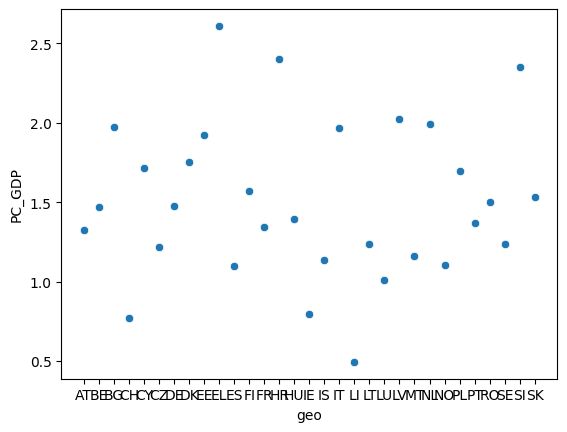

In [329]:
sns.scatterplot(x="geo",y="PC_GDP",data=dfTassePC)

In [330]:
dfEmissioni.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'airpol', 'Air pollutants and greenhouse gases', 'indic_env',
       'Environment indicator', 'unit', 'Unit of measure', 'geo',
       'Geopolitical entity (reporting)', 'TIME_PERIOD', 'Time', 'OBS_VALUE',
       'Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],
      dtype='object')

In [331]:
dfEmissioni["OBS_FLAG"]=dfEmissioni["OBS_FLAG"].fillna(0)
dfEmissioni=dfEmissioni[dfEmissioni["OBS_FLAG"]==0]
dfEmissioniTempoT=dfEmissioni[dfEmissioni["unit"]=='T']
dfEmissioniTempoProCap=dfEmissioni[dfEmissioni['unit']=='KG_HAB']
dfEmissioniTempoProCap=dfEmissioni.groupby('TIME_PERIOD').aggregate({"OBS_VALUE":"mean"})
dfEmissioniTempoT=dfEmissioni.groupby('TIME_PERIOD').aggregate({"OBS_VALUE":"mean"})
dfEmissioniTempoT=dfEmissioniTempoT.rename(columns={"OBS_VALUE":"Emissioni"})
dfEmissioniTempoProCap=dfEmissioniTempoProCap.rename(columns={"OBS_VALUE":"Emissioni"})

dfEmissioniTempoT.to_pickle("EmissioniTempoT.pickle")
dfEmissioniTempoProCap.to_pickle("EmissioniTempoProCap.pickle")
dfEmissioni.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'airpol', 'Air pollutants and greenhouse gases', 'indic_env',
       'Environment indicator', 'Unit of measure',
       'Geopolitical entity (reporting)', 'TIME_PERIOD', 'Time',
       'Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'], axis=1, inplace=True )

In [14]:
dfEmissioniProCap=dfEmissioni[dfEmissioni['unit']=='KG_HAB']
dfEmissioniT=dfEmissioni[dfEmissioni['unit']=='T']

In [333]:
dfEmissioniProCap=dfEmissioniProCap.groupby("geo").aggregate({"OBS_VALUE":"mean"})
dfEmissioniProCap=dfEmissioniProCap.rename(columns={"OBS_VALUE":"EmissioniProCap"})

In [15]:
dfEmissioniT=dfEmissioniT.groupby("geo").aggregate({"OBS_VALUE":"mean"})
dfEmissioniT=dfEmissioniT.rename(columns={"OBS_VALUE":"T"})

In [17]:
dfEmissioniT.to_pickle("EmissioniTGEO.pickle")
dfEmissioniProCap.to_pickle("EmissioniProCapGEO.pickle")
sns.scatterplot(x="geo",y="EmissioniProCap",data=dfEmissioniProCap)

In [336]:
dfTotali=dfEmissioniT.merge(dfTasseABS,on="geo")
dfProCap=dfEmissioniProCap.merge(dfTassePC,on="geo")

In [170]:
correlazione1=sp.stats.pearsonr(dfTotali["T"],dfTotali["MilioniE"])
correlazione1

PearsonRResult(statistic=np.float64(0.9433264133958336), pvalue=np.float64(6.095616879119772e-15))

In [171]:
correlazione2=sp.stats.pearsonr(dfProCap["EmissioniProCap"],dfProCap["PC_GDP"])
correlazione2

PearsonRResult(statistic=np.float64(-0.16373494271493325), pvalue=np.float64(0.3872790357149258))

In [172]:
dfTasseCF.drop(['energia_ammontare','paese', 'di_cui_carburanti_per_autotrazione_ammontare',
       'di_cui_carburanti_per_autotrazione_ranking'], axis=1, inplace=True)

In [173]:
dfTotali2=dfTasseCF.merge(dfEmissioniProCap, on="geo")

In [174]:
correlazione3=sp.stats.pearsonr(dfTotali2["energia_percent_su_tassazione_totale"]-dfTotali2["di_cui_carburanti_per_autotrazione_percent_su_tassazione_totale"],dfTotali2["EmissioniProCap"])
correlazione3

PearsonRResult(statistic=np.float64(-0.06910969646246717), pvalue=np.float64(0.7319580342146438))

In [175]:
gdfNazioni=gdfNazioni[gdfNazioni["EU_STAT"]=='T']

In [176]:
gdfNazioni.drop([ 'CNTR_NAME', 'NAME_ENGL', 'NAME_FREN', 'ISO3_CODE',
       'SVRG_UN', 'CAPT', 'EU_STAT', 'EFTA_STAT', 'CC_STAT', 'NAME_GERM'],axis=1,inplace=True)

In [177]:
gdfNazioni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

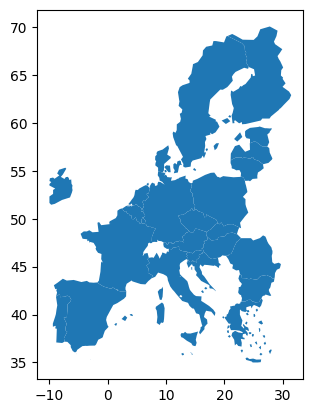

In [178]:
mask = gpd.GeoSeries([box(-10, 35, 32, 72)], crs="EPSG:4326")
gdfNazioni = gdfNazioni[gdfNazioni.intersects(mask.iloc[0])].copy()
gdfNazioni["geometry"] = gdfNazioni.geometry.intersection(mask.iloc[0])
gdfNazioni.plot()

In [179]:
gdfNazioni.columns

Index(['CNTR_ID', 'geometry'], dtype='object')

In [18]:
gdfNazioniEmissioniT=gpd.GeoDataFrame(
    dfEmissioniT.merge(gdfNazioni,left_on="geo",right_on="CNTR_ID"),
    geometry="geometry",
    crs=gdfNazioni.crs
)

<Axes: >

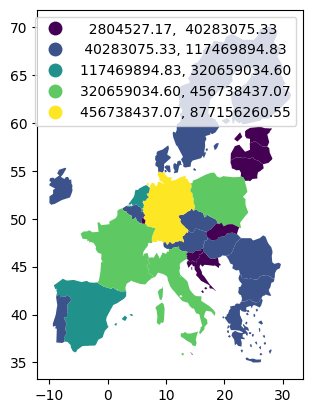

In [181]:
gdfNazioniEmissioniT.plot(column="T",scheme="fisher_jenks",k=5, legend=True)

('WARNING: ', 73092021.98555556, ' is an island (no neighbors)')
('WARNING: ', 2804527.1666666665, ' is an island (no neighbors)')


/Users/riccardobolzonello/Desktop/Uni/IBML/DataScience/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 73092021.98555556, 2804527.1666666665.
  W.__init__(self, neighbors, ids=ids, **kw)


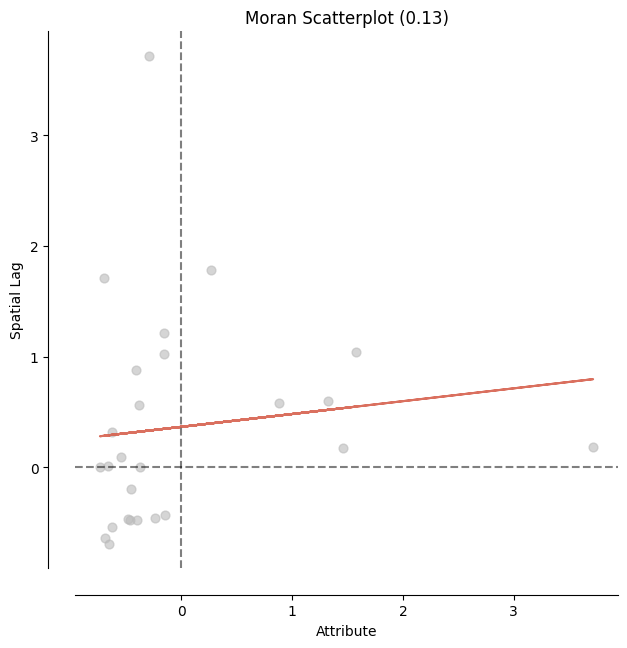

In [348]:
W=weights.Queen.from_dataframe(gdfNazioniEmissioniT,ids="T_STD")
Moran=esda.Moran(gdfNazioniEmissioniT["T_STD"],W)
moran_scatterplot(Moran);

In [183]:
Moran.I

np.float64(0.12541611817283857)

In [184]:
Lisa=esda.Moran_Local(gdfNazioniEmissioniT["T"],W)

/Users/riccardobolzonello/Desktop/Uni/IBML/DataScience/.venv/lib/python3.12/site-packages/esda/moran.py:1351: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


(<Figure size 640x480 with 1 Axes>, <Axes: >)

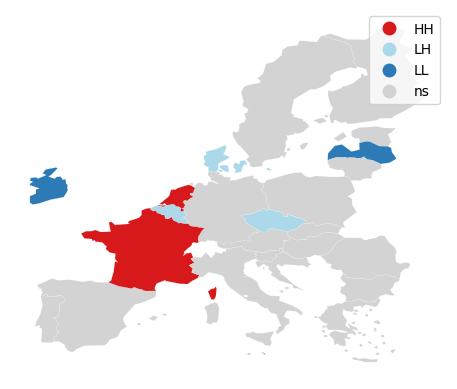

In [185]:
lisa_cluster(Lisa,gdfNazioniEmissioniT)

In [23]:
gdfNazioniEmissioniT["Area"]=gdfNazioniEmissioniT.to_crs(epsg=32632).area / 10**6

In [24]:
gdfNazioniEmissioniT

,T,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,geometry,Area
0,7.202148e+07,AT,Österreich,Austria,Autriche,AUT,UN Member State,Vienna,T,F,F,Österreich,"POLYGON ((16.94028 48.61725, 16.94978 48.53579...",84300.491375
1,1.143324e+08,BE,Belgien-Belgique-België,Belgium,Belgique,BEL,UN Member State,Brussels,T,F,F,Belgien,"POLYGON ((5.56628 51.22084, 5.79827 51.05985, ...",30365.121427
2,5.660654e+07,BG,България,Bulgaria,Bulgarie,BGR,UN Member State,Sofia,T,F,F,Bulgarien,"POLYGON ((24.11204 43.69995, 24.32352 43.69769...",116408.582534
3,5.146654e+07,CH,Schweiz-Suisse-Svizzera-Svizra,Switzerland,Suisse,CHE,UN Member State,Bern,F,T,F,Schweiz,"POLYGON ((9.18219 47.65589, 9.50695 47.54974, ...",40180.533990
4,8.740745e+06,CY,Κύπρος-Kıbrıs,Cyprus,Chypre,CYP,UN Member State,Nicosia,T,F,F,Zypern,"POLYGON ((33.94327 35.4252, 34.15511 35.53952,...",10493.796173
5,1.140073e+08,CZ,Česká Republika,Czechia,Tchéquie,CZE,UN Member State,Prague,T,F,F,Tschechien,"POLYGON ((14.49122 51.04353, 14.6188 50.8578, ...",81019.452902
6,8.614769e+08,DE,Deutschland,Germany,Allemagne,DEU,UN Member State,Berlin,T,F,F,Deutschland,"MULTIPOLYGON (((9.1131 54.8736, 9.40281 54.806...",354078.998336
7,8.935152e+07,DK,Danmark,Denmark,Danemark,DNK,UN Member State,Copenhagen,T,F,F,Dänemark,"MULTIPOLYGON (((15.16222 55.10089, 15.04086 54...",41216.160704
8,1.745866e+07,EE,Eesti,Estonia,Estonie,EST,UN Member State,Tallinn,T,F,F,Estland,"MULTIPOLYGON (((26.05108 59.61685, 26.9611 59....",46621.318276
9,9.811770e+07,EL,Ελλάδα,Greece,Grèce,GRC,UN Member State,Athens,T,F,F,Griechenland,"MULTIPOLYGON (((28.13811 36.32213, 27.83164 35...",136159.677255


In [10]:
dfImprese.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'age', 'Age class', 'sizeclas', 'Size classes in number of employees',
       'indic_sbs', 'Economic indicator for structural business statistics',
       'nace_r2',
       'Statistical classification of economic activities in the European Community (NACE Rev. 2)','Geopolitical entity (reporting)', 'TIME_PERIOD', 'Time', 'Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],axis=1, inplace=True)

In [11]:
dfImprese=dfImprese.rename(columns={"OBS_VALUE":"I"})
dfImprese=dfImprese.groupby('geo').aggregate({"I":"mean"})
dfImprese.drop('MT',inplace=True)

In [25]:
gdfDensitàIndustriale=gpd.GeoDataFrame(dfImprese.merge(gdfNazioniEmissioniT, left_on="geo", right_on="CNTR_ID"), geometry="geometry",crs=gdfNazioniEmissioniT.crs)
gdfDensitàIndustriale["D"]=gdfDensitàIndustriale["I"]/gdfDensitàIndustriale["Area"]

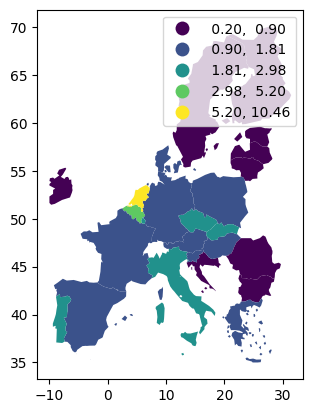

In [201]:
gdfDensitàIndustriale.plot(column="D",scheme="fisher_jenks",k=5,legend=True);

In [20]:
gdfDensitàIndustriale

,I,T,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,geometry
0,105606.818182,7.202148e+07,AT,Österreich,Austria,Autriche,AUT,UN Member State,Vienna,T,F,F,Österreich,"POLYGON ((16.94028 48.61725, 16.94978 48.53579..."
1,157893.047619,1.143324e+08,BE,Belgien-Belgique-België,Belgium,Belgique,BEL,UN Member State,Brussels,T,F,F,Belgien,"POLYGON ((5.56628 51.22084, 5.79827 51.05985, ..."
2,69823.272727,5.660654e+07,BG,България,Bulgaria,Bulgarie,BGR,UN Member State,Sofia,T,F,F,Bulgarien,"POLYGON ((24.11204 43.69995, 24.32352 43.69769..."
3,16393.800000,8.740745e+06,CY,Κύπρος-Kıbrıs,Cyprus,Chypre,CYP,UN Member State,Nicosia,T,F,F,Zypern,"POLYGON ((33.94327 35.4252, 34.15511 35.53952,..."
4,215642.045455,1.140073e+08,CZ,Česká Republika,Czechia,Tchéquie,CZE,UN Member State,Prague,T,F,F,Tschechien,"POLYGON ((14.49122 51.04353, 14.6188 50.8578, ..."
5,545673.272727,8.614769e+08,DE,Deutschland,Germany,Allemagne,DEU,UN Member State,Berlin,T,F,F,Deutschland,"MULTIPOLYGON (((9.1131 54.8736, 9.40281 54.806..."
6,59670.045455,8.935152e+07,DK,Danmark,Denmark,Danemark,DNK,UN Member State,Copenhagen,T,F,F,Dänemark,"MULTIPOLYGON (((15.16222 55.10089, 15.04086 54..."
7,26378.727273,1.745866e+07,EE,Eesti,Estonia,Estonie,EST,UN Member State,Tallinn,T,F,F,Estland,"MULTIPOLYGON (((26.05108 59.61685, 26.9611 59...."
8,165200.809524,9.811770e+07,EL,Ελλάδα,Greece,Grèce,GRC,UN Member State,Athens,T,F,F,Griechenland,"MULTIPOLYGON (((28.13811 36.32213, 27.83164 35..."
9,596797.590909,3.173660e+08,ES,España,Spain,Espagne,ESP,UN Member State,Madrid,T,F,F,Spanien,"MULTIPOLYGON (((4.31657 39.87646, 4.20006 39.8..."


In [26]:
gdfDensitàIndustriale['T_KM']=gdfDensitàIndustriale['T']/gdfDensitàIndustriale['Area']

In [28]:
correlazioneD=sp.stats.pearsonr(gdfDensitàIndustriale["D"],gdfDensitàIndustriale["T_KM"])
correlazioneD


PearsonRResult(statistic=np.float64(0.8819777173015629), pvalue=np.float64(2.5787363516942264e-10))

In [2]:
W2=weights.Queen.from_dataframe(gdfDensitàIndustriale, ids="D")
Lisa2=esda.Moran_Local(gdfDensitàIndustriale["D"],W2)
lisa_cluster(Lisa2,gdfDensitàIndustriale)

NameError: name 'weights' is not defined

<Axes: xlabel='T_KM', ylabel='Count'>

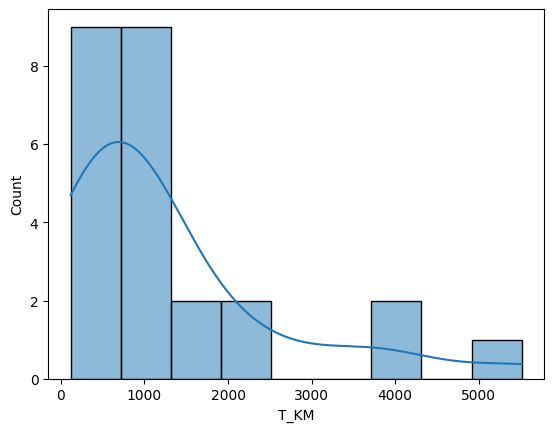

In [215]:
sns.histplot(gdfDensitàIndustriale['T_KM'],kde=True)

<Axes: xlabel='T_KM', ylabel='D'>

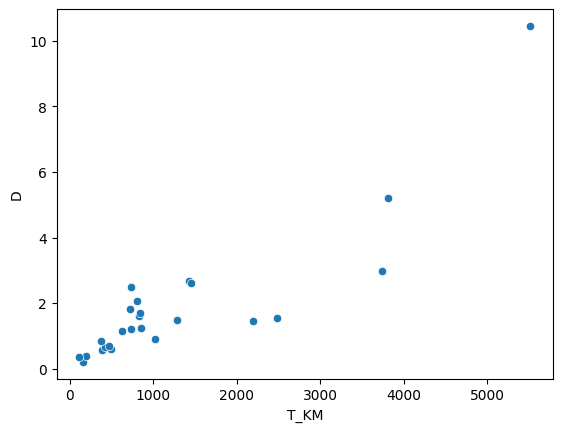

In [217]:
sns.scatterplot(x="T_KM",y="D",data=gdfDensitàIndustriale)

In [218]:
gdfDensitàIndustriale[gdfDensitàIndustriale['T_KM']>5000]

,I,T,CNTR_ID,geometry,Area,D,T_KM
18,379297.227273,1.999951e+08,NL,"MULTIPOLYGON (((7.09269 52.8382, 7.00623 52.63...",36276.738079,10.45566,5513.040455


In [32]:
Regressione=LinearRegression()
Regressione.fit(gdfDensitàIndustriale[["D"]],gdfDensitàIndustriale["T_KM"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


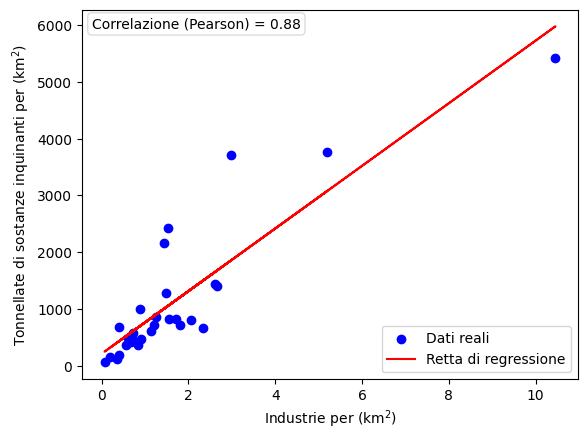

In [35]:
correlazione,p=sp.stats.pearsonr(gdfDensitàIndustriale["D"],gdfDensitàIndustriale["T_KM"])
fig,ax=plt.subplots()
ax.scatter(gdfDensitàIndustriale["D"], gdfDensitàIndustriale["T_KM"], color="blue", label="Dati reali")
ax.plot(gdfDensitàIndustriale["D"], Regressione.predict(gdfDensitàIndustriale[["D"]]), color="red", label="Retta di regressione")
ax.legend()
ax.set_xlabel(r"Industrie per (km$^2$)")
ax.set_ylabel(r"Tonnellate di sostanze inquinanti per (km$^2$)")
ax.text(0.02, 0.98, f"Correlazione (Pearson) = {correlazione:.2f}",
        transform=ax.transAxes, ha="left", va="top",
        bbox=dict(boxstyle="round", fc="white", ec="0.85", alpha=0.9))
plt.savefig("Grafici/Regressione.svg",format="svg")

In [270]:
dfTassePercent=dfTassePercent[dfTassePercent['unit']=='PC_TSCO']
dfTassePercent.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'tax', 'Taxes', 'unit', 'Unit of measure', 'geo',
       'Geopolitical entity (reporting)', 'Time','Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],axis=1,inplace=True)

/var/folders/rc/xlbbg4d5605gwwrs3d2h21yh0000gn/T/ipykernel_19816/2888759270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTassePercent.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',


In [284]:
dfTassePercent=dfTassePercent.rename(columns={"OBS_VALUE":"PERC_TASSE"})

In [265]:
dfEmissioniEuropa.drop(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'unit', 'Unit of measure', 'airpol',
       'Air pollutants and greenhouse gases', 'src_nfr',
       'Source sectors for emissions of air pollutants (Nomenclature for reporting, CLRTAP)',
       'geo', 'Geopolitical entity (reporting)','Time','Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],axis=1,inplace=True)

KeyError: "['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency', 'unit', 'Unit of measure', 'airpol', 'Air pollutants and greenhouse gases', 'src_nfr', 'Source sectors for emissions of air pollutants (Nomenclature for reporting, CLRTAP)', 'geo', 'Geopolitical entity (reporting)', 'Time', 'Observation value', 'OBS_FLAG', 'Observation status (Flag) V2 structure', 'CONF_STATUS', 'Confidentiality status (flag)'] not found in axis"

In [274]:
dfEmissioniEuropa=dfEmissioniEuropa.groupby('TIME_PERIOD').aggregate({"OBS_VALUE":"sum"})
dfEmissioniEuropa=dfEmissioniEuropa.rename(columns={"OBS_VALUE":"EmissioniAnno"})

In [285]:
dfTempo=dfEmissioniEuropa.merge(dfTassePercent, on="TIME_PERIOD")

In [286]:
dfTempo

,TIME_PERIOD,EmissioniAnno,PERC_TASSE
0,1995,301776303,6.36
1,1996,297767397,6.42
2,1997,284545253,6.30
3,1998,269624513,6.35
4,1999,253978420,6.43
5,2000,239205731,6.28
6,2001,229623507,6.40
7,2002,221849851,6.50
8,2003,218285324,6.62
9,2004,210479853,6.64


<Axes: xlabel='TIME_PERIOD', ylabel='PERC_TASSE'>

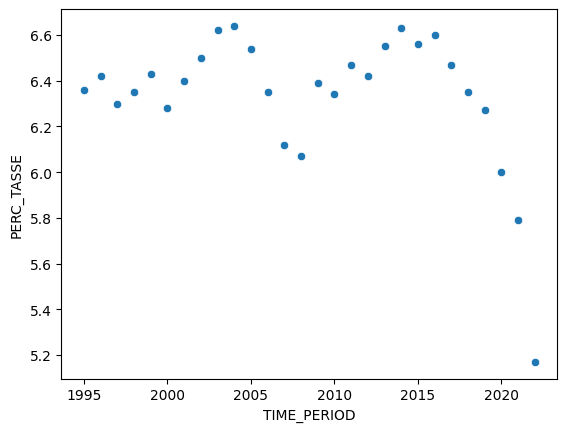

In [292]:
sns.scatterplot(x=dfTempo['TIME_PERIOD'],y=dfTempo["PERC_TASSE"])

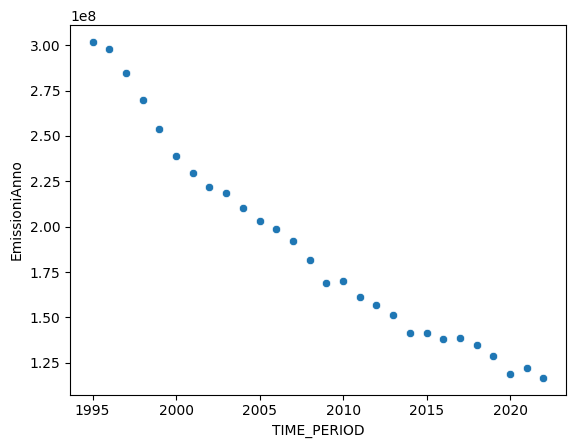

In [337]:
sns.scatterplot(x=dfTempo['TIME_PERIOD'],y=dfTempo["EmissioniAnno"])
dfTempo.to_pickle("EmissioniTempoT.pickle")

In [310]:
dfPilProCap=dfPilProCap.set_index('TIME_PERIOD')

KeyError: "None of ['TIME_PERIOD'] are in the columns"

In [309]:
dfPilProCap=dfPilProCap.groupby('geo','TIME_PERIOD').aggregate({"OBS_VALUE":"mean"})

ValueError: No axis named TIME_PERIOD for object type DataFrame

In [308]:
dfPilProCap

,OBS_VALUE
geo,
AL,1886.441304
AT,21271.210000
BE,19905.734000
BG,3817.964000
CH,36397.092000
CY,11917.046000
CZ,9200.694000
DE,19830.908000
DK,25696.100000


In [30]:
gdfDensitàIndustriale.to_pickle("Dataset/Densità.pickle")